# DATA WRANGLING

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as snsa

## GATHERING DATA

In [3]:
# Memuat tabel customers
customers_df = pd.read_csv("https://raw.githubusercontent.com/dicodingacademy/dicoding_dataset/main/DicodingCollection/customers.csv")
customers_df.head()

,customer_id,customer_name,gender,age,home_address,zip_code,city,state,country
0,1,fulan 1,Female,30,8606 Victoria TerraceSuite 560,5464,Johnstonhaven,Northern Territory,Australia
1,2,fulan 2,Prefer not to say,69,8327 Kirlin SummitApt. 461,8223,New Zacharyfort,South Australia,Australia
2,3,fulan 3,Prefer not to say,59,269 Gemma SummitSuite 109,5661,Aliburgh,Australian Capital Territory,Australia
3,4,fulan 4,Prefer not to say,67,743 Bailey GroveSuite 141,1729,South Justinhaven,Queensland,Australia
4,5,fulan 5,Prefer not to say,30,48 Hyatt ManorSuite 375,4032,Griffithsshire,Queensland,Australia


In [4]:
# Memuat tabel orders
orders_df = pd.read_csv("https://raw.githubusercontent.com/dicodingacademy/dicoding_dataset/main/DicodingCollection/orders.csv")
orders_df.head()

,order_id,customer_id,payment,order_date,delivery_date
0,1,64,30811,2021-8-30,2021-09-24
1,2,473,50490,2021-2-3,2021-02-13
2,3,774,46763,2021-10-8,2021-11-03
3,4,433,39782,2021-5-6,2021-05-19
4,5,441,14719,2021-3-23,2021-03-24


In [5]:
# Memuat tabel products
product_df = pd.read_csv("https://raw.githubusercontent.com/dicodingacademy/dicoding_dataset/refs/heads/main/DicodingCollection/products.csv")
product_df.head()

,product_id,product_type,product_name,size,colour,price,quantity,description
0,0,Shirt,Oxford Cloth,XS,red,114,66,"A red coloured, XS sized, Oxford Cloth Shirt"
1,1,Shirt,Oxford Cloth,S,red,114,53,"A red coloured, S sized, Oxford Cloth Shirt"
2,2,Shirt,Oxford Cloth,M,red,114,54,"A red coloured, M sized, Oxford Cloth Shirt"
3,3,Shirt,Oxford Cloth,L,red,114,69,"A red coloured, L sized, Oxford Cloth Shirt"
4,4,Shirt,Oxford Cloth,XL,red,114,47,"A red coloured, XL sized, Oxford Cloth Shirt"


In [6]:
# Memuat tabel sales
sales_df = pd.read_csv("https://raw.githubusercontent.com/dicodingacademy/dicoding_dataset/refs/heads/main/DicodingCollection/sales.csv")
sales_df.head()

,sales_id,order_id,product_id,price_per_unit,quantity,total_price
0,0,1,218,106,2,212.0
1,1,1,481,118,1,118.0
2,2,1,2,96,3,288.0
3,3,1,1002,106,2,212.0
4,4,1,691,113,3,339.0


## ASSESSING DATA & CLEANING DATA

### 1. customers_df

In [7]:
# 1. memeriksa tipe data data dari tiap kolom
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1007 entries, 0 to 1006
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customer_id    1007 non-null   int64 
 1   customer_name  1007 non-null   object
 2   gender         989 non-null    object
 3   age            1007 non-null   int64 
 4   home_address   1007 non-null   object
 5   zip_code       1007 non-null   int64 
 6   city           1007 non-null   object
 7   state          1007 non-null   object
 8   country        1007 non-null   object
dtypes: int64(3), object(6)
memory usage: 70.9+ KB


In [8]:
# Kolom 'gender' jumlah datanya lebih sedikit dibandingkan dengan yang lain, artinya ada data yang hilang

# 2. Cek jumlah data yang hilang di tiap kolom
customers_df.isna().sum()

customer_id       0
customer_name     0
gender           18
age               0
home_address      0
zip_code          0
city              0
state             0
country           0
dtype: int64

In [9]:
# mengatasi data yang hilang(missing value)
# menampilkan baris yang memiliki missing value di kolom gender dengan filtering 
# dengan tujuan untuk menentukan metode dalam mengatasi missing value tersebut baik dengan dropping, imputation, atau interpolation
customers_df[customers_df.gender.isna()]

,customer_id,customer_name,gender,age,home_address,zip_code,city,state,country
38,39,fulan 39,NaN,80,7440 Cameron Estate DrSuite 628,4622,North Victoriachester,Northern Territory,Australia
167,168,fulan 168,NaN,27,2781 Berge MallSuite 452,1975,North Leoburgh,Western Australia,Australia
322,322,fulan 322,NaN,30,593 Becker CircleApt. 333,1640,Jacobiview,Western Australia,Australia
393,393,fulan 393,NaN,34,5158 Levi HillSuite 531,1474,Johnsburgh,Queensland,Australia
442,442,fulan 442,NaN,26,5157 Feil RoadApt. 633,7249,Port Chloe,New South Wales,Australia
722,720,fulan 720,NaN,40,31 Jordan ParadeApt. 400,1380,West Henry,South Australia,Australia
745,743,fulan 743,NaN,57,09 Christopher StreetSuite 967,6226,Lake Lukemouth,Western Australia,Australia
773,771,fulan 771,NaN,74,7367 Wright JunctionApt. 773,8882,Kuhntown,Victoria,Australia
798,795,fulan 795,NaN,49,487 Summer MewsApt. 874,1712,East Hayden,Australian Capital Territory,Australia
801,798,fulan 798,NaN,56,27 Aiden KnollApt. 875,6531,Port Sam,Australian Capital Territory,Australia


In [10]:
# karena baris dengan missing value masih memuat banyak informasi, maka untuk mengatasi data yang hilang akan digunakan metode imputation
# cek nilai paling dominan di kolom gender dengan value_counts() sebagai pengganti missing value
customers_df.gender.value_counts()

gender
Prefer not to say    731
Male                 143
Female               115
Name: count, dtype: int64

In [11]:
# berdasarkan hasil diatas nilai yang paling dominan adalah 'Prefer not to say' maka nilai tersebut yang akan menjadi pengganti missing value
customers_df.fillna(value="Prefer not to say", inplace=True)

# mengecek kembali jumlah data yang hilang di tiap kolom
customers_df.isna().sum()

customer_id      0
customer_name    0
gender           0
age              0
home_address     0
zip_code         0
city             0
state            0
country          0
dtype: int64

In [12]:
# 3. memeriksa duplicate data
print("Jumlah duplikasi: ", customers_df.duplicated().sum())

Jumlah duplikasi:  7


In [13]:
# menghapus duplicate data
customers_df.drop_duplicates(inplace=True)

# periksa kembali
print("Jumlah duplikasi: ", customers_df.duplicated().sum())

Jumlah duplikasi:  0


In [14]:
# 4. menampilkan ringkasan statistik untuk kolom numerik (mean, std, min, dll.) 
customers_df.describe()

,customer_id,age,zip_code
count,1000.000000,1000.00000,1000.000000
mean,500.500000,50.94000,5004.872000
std,288.819436,30.59095,2884.497332
min,1.000000,20.00000,2.000000
25%,250.750000,34.00000,2401.750000
50%,500.500000,50.00000,5083.000000
75%,750.250000,65.00000,7460.250000
max,1000.000000,700.00000,9998.000000


In [15]:
# nilai max pada kolom age terlihat tidak wajar (700) karena umur manusia normalnya berada di rentang 0–120 tahun, kemungkinan data tidak akurat
# menampilkan baris yang memiliki nilai age maksimum untuk memastikan nilai yang tidak wajar tersebut
customers_df[customers_df.age == customers_df.age.max()]

,customer_id,customer_name,gender,age,home_address,zip_code,city,state,country
967,961,fulan 961,Prefer not to say,700,29 Farrell ParadeSuite 818,6528,New Joseph,South Australia,Australia


In [16]:
# mengganti 700 tersebut dengan 70 (berasumsi: human error kelebihan memasukan nilai nol)
customers_df['age'] = customers_df['age'].replace(700, 70)

# menampilkan kembali ringkasan statistik untuk melihat apakah masih ada data yang tidak akurat
customers_df.describe()

,customer_id,age,zip_code
count,1000.000000,1000.000000,1000.000000
mean,500.500000,50.310000,5004.872000
std,288.819436,22.673155,2884.497332
min,1.000000,20.000000,2.000000
25%,250.750000,34.000000,2401.750000
50%,500.500000,50.000000,5083.000000
75%,750.250000,65.000000,7460.250000
max,1000.000000,500.000000,9998.000000


In [17]:
# berdasarkan data diatas ternyata masih ada data yang tidak akurat yaitu age == 500
# menampilkan baris yang memiliki nilai age maksimum untuk memastikan nilai yang tidak wajar tersebut
customers_df[customers_df.age == customers_df.age.max()]

,customer_id,customer_name,gender,age,home_address,zip_code,city,state,country
215,216,fulan 216,Prefer not to say,500,038 Haley MewsApt. 810,3991,Bayertown,Northern Territory,Australia


In [18]:
# mengganti 500 tersebut dengan 50 (berasumsi: human error kelebihan memasukan nilai nol)
customers_df['age'] = customers_df['age'].replace(500, 50)

# menampilkan kembali ringkasan statistik untuk melihat apakah masih ada data yang tidak akurat
customers_df.describe()

,customer_id,age,zip_code
count,1000.000000,1000.000000,1000.000000
mean,500.500000,49.860000,5004.872000
std,288.819436,17.647828,2884.497332
min,1.000000,20.000000,2.000000
25%,250.750000,34.000000,2401.750000
50%,500.500000,50.000000,5083.000000
75%,750.250000,65.000000,7460.250000
max,1000.000000,80.000000,9998.000000


### 2. orders_df

In [19]:
# 1. memeriksa tipe data data dari tiap kolom
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   order_id       1000 non-null   int64 
 1   customer_id    1000 non-null   int64 
 2   payment        1000 non-null   int64 
 3   order_date     1000 non-null   object
 4   delivery_date  1000 non-null   object
dtypes: int64(3), object(2)
memory usage: 39.2+ KB


In [20]:
# pada hasil diatas tidak ditemukan adanya missing value
# namun terdapat kesalahan type data pada order_date & delivery_date yang seharusnya bertipe datetime bukan object

# 2. mengganti tipe data order_date & delivery_date menjadi datetime
datetime_columns = ['order_date', 'delivery_date']

for columns in datetime_columns:
    orders_df[columns] = pd.to_datetime(orders_df[columns])

# memeriksa kembali tipe data data dari tiap kolom
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   order_id       1000 non-null   int64         
 1   customer_id    1000 non-null   int64         
 2   payment        1000 non-null   int64         
 3   order_date     1000 non-null   datetime64[ns]
 4   delivery_date  1000 non-null   datetime64[ns]
dtypes: datetime64[ns](2), int64(3)
memory usage: 39.2 KB


In [21]:
# 2. memeriksa duplikasi data
print("Jumlah duplikasi ", orders_df.duplicated().sum())

Jumlah duplikasi  0


In [22]:
# 3. menampilkan ringkasan statistik untuk kolom numerik (mean, std, min, dll.) 
orders_df.describe()

,order_id,customer_id,payment,order_date,delivery_date
count,1000.000000,1000.000000,1000.000000,1000,1000
mean,500.500000,506.640000,33972.936000,2021-05-27 18:38:52.800000,2021-06-10 20:31:12
min,1.000000,1.000000,10043.000000,2021-01-01 00:00:00,2021-01-03 00:00:00
25%,250.750000,275.250000,21329.250000,2021-03-13 18:00:00,2021-03-28 00:00:00
50%,500.500000,515.000000,33697.500000,2021-05-27 12:00:00,2021-06-11 12:00:00
75%,750.250000,737.250000,46249.000000,2021-08-12 06:00:00,2021-08-24 06:00:00
max,1000.000000,1000.000000,59910.000000,2021-10-24 00:00:00,2021-11-20 00:00:00
std,288.819436,277.115502,14451.609047,NaN,NaN


### 3. product_df

In [23]:
# 1. memeriksa tipe data dari tiap kolom
product_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1266 entries, 0 to 1265
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   product_id    1266 non-null   int64 
 1   product_type  1266 non-null   object
 2   product_name  1266 non-null   object
 3   size          1266 non-null   object
 4   colour        1266 non-null   object
 5   price         1266 non-null   int64 
 6   quantity      1266 non-null   int64 
 7   description   1266 non-null   object
dtypes: int64(3), object(5)
memory usage: 79.3+ KB


In [24]:
# 2. memeriksa duplikasi data
print("Jumlah duplikasi: ", product_df.duplicated().sum())

Jumlah duplikasi:  6


In [25]:
# menghapus duplicate data
product_df.drop_duplicates(inplace=True)

# periksa kembali
print("Jumlah duplikasi: ", product_df.duplicated().sum())

Jumlah duplikasi:  0


In [26]:
# 3. menampilkan ringkasan statistik untuk kolom numerik (mean, std, min, dll.) 
product_df.describe()

,product_id,price,quantity
count,1260.000000,1260.000000,1260.000000
mean,629.500000,105.805556,60.150000
std,363.874979,9.704423,11.670573
min,0.000000,90.000000,40.000000
25%,314.750000,95.750000,50.000000
50%,629.500000,108.500000,60.000000
75%,944.250000,114.000000,70.000000
max,1259.000000,119.000000,80.000000


### 4. sales_df

In [27]:
# 1. memeriksa tipe data data dari tiap kolom
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sales_id        5000 non-null   int64  
 1   order_id        5000 non-null   int64  
 2   product_id      5000 non-null   int64  
 3   price_per_unit  5000 non-null   int64  
 4   quantity        5000 non-null   int64  
 5   total_price     4981 non-null   float64
dtypes: float64(1), int64(5)
memory usage: 234.5 KB


In [28]:
# Kolom 'total_price' jumlah datanya lebih sedikit dibandingkan dengan yang lain, artinya ada data yang hilang
# Cek jumlah data yang hilang di tiap kolom
sales_df.isna().sum()

sales_id           0
order_id           0
product_id         0
price_per_unit     0
quantity           0
total_price       19
dtype: int64

In [29]:
# mengatasi data yang hilang(missing value)
# menampilkan baris yang memiliki missing value di kolom total_price dengan filtering 
# dengan tujuan untuk menentukan metode dalam mengatasi missing value tersebut baik dengan dropping, imputation, atau interpolation
sales_df[sales_df.total_price.isna()]

,sales_id,order_id,product_id,price_per_unit,quantity,total_price
9,9,2,1196,105,1,NaN
121,121,27,1027,90,3,NaN
278,278,63,360,94,2,NaN
421,421,95,1091,115,1,NaN
489,489,108,1193,105,3,NaN
539,539,117,405,119,2,NaN
636,636,134,653,93,3,NaN
687,687,145,1138,102,1,NaN
854,854,177,64,104,1,NaN
1079,1079,222,908,94,3,NaN


In [30]:
# Mengisi nilai yang hilang pada kolom total_price dengan hasil perkalian price_per_unit dan quantity
sales_df["total_price"] = sales_df["price_per_unit"] * sales_df["quantity"]

# Cek jumlah data yang hilang kembali di tiap kolom
sales_df.isna().sum()

sales_id          0
order_id          0
product_id        0
price_per_unit    0
quantity          0
total_price       0
dtype: int64

In [31]:
# 2. memeriksa duplikasi data
print("Jumlah duplikasi: ", sales_df.duplicated().sum())

Jumlah duplikasi:  0


In [32]:
# 3. menampilkan ringkasan statistik untuk kolom numerik (mean, std, min, dll.) 
sales_df.describe()

,sales_id,order_id,product_id,price_per_unit,quantity,total_price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000
mean,2499.500000,503.038200,634.053200,103.501600,1.99240,206.360000
std,1443.520003,285.964418,363.255794,9.195004,0.80751,86.357457
min,0.000000,1.000000,1.000000,90.000000,1.00000,90.000000
25%,1249.750000,258.000000,323.000000,95.000000,1.00000,112.000000
50%,2499.500000,504.500000,635.000000,102.000000,2.00000,204.000000
75%,3749.250000,749.000000,951.000000,112.000000,3.00000,285.000000
max,4999.000000,999.000000,1259.000000,119.000000,3.00000,357.000000


## EXPLORATORY DATA ANALYSIS

### 1. Eksplorasi Data customers_df

In [33]:
# pada customers_df ini memuat berbagai informasi terkait:
# customer, seperti customer_id, customer_name, gender, age, home_address, zip_code, city, state, dan country. 

In [34]:
customers_df.describe(include="all")

,customer_id,customer_name,gender,age,home_address,zip_code,city,state,country
count,1000.000000,1000,1000,1000.000000,1000,1000.000000,1000,1000,1000
unique,NaN,1000,3,NaN,1000,NaN,961,8,1
top,NaN,fulan 1,Prefer not to say,NaN,8606 Victoria TerraceSuite 560,NaN,East Sophia,South Australia,Australia
freq,NaN,1,742,NaN,1,NaN,3,139,1000
mean,500.500000,NaN,NaN,49.860000,NaN,5004.872000,NaN,NaN,NaN
std,288.819436,NaN,NaN,17.647828,NaN,2884.497332,NaN,NaN,NaN
min,1.000000,NaN,NaN,20.000000,NaN,2.000000,NaN,NaN,NaN
25%,250.750000,NaN,NaN,34.000000,NaN,2401.750000,NaN,NaN,NaN
50%,500.500000,NaN,NaN,50.000000,NaN,5083.000000,NaN,NaN,NaN
75%,750.250000,NaN,NaN,65.000000,NaN,7460.250000,NaN,NaN,NaN


In [35]:
# dari informasi diatas jumlah pelanggan sebanyak 1001 orang yang berumur di kisaran antara 20 hingga 80 tahun 
# dengan rata-rata umur sebesar 49.87 tahun dengan standar deviasinya sebesar 17.64 tahun
# informasi tersebut memberikan gambaran bahwa segmentasi pelanggan yang dimiliki cukup luas mulai dari remaja hingga lanjut usia.  


# melihat demografi pelanggan berdasarkan jenis kelamin (gender)
# menggunakan method groupby() yang diikuti dengan method agg()
customers_df.groupby(by="gender").agg({
    "customer_id": "nunique",
    "age":["max","min","mean","std"]
})

customer_id age                          
                      nunique max min       mean        std
gender                                                     
Female                    115  79  20  49.147826  16.646607
Male                      143  80  20  51.230769  18.462635
Prefer not to say         742  80  20  49.706199  17.648386

In [36]:
# melihat persebaran jumlah pelanggan berdasarkan kota (city)
customers_df.groupby(by="city").customer_id.nunique().sort_values(ascending=False)

city
East Aidan       3
East Sophia      3
New Ava          3
West Jackfort    2
Corkeryshire     2
                ..
Jordanside       1
Josephland       1
Josephmouth      1
Justinport       1
Zacville         1
Name: customer_id, Length: 961, dtype: int64

In [37]:
# melihat persebaran jumlah pelanggan berdasarkan negara bagian (state)
customers_df.groupby(by="state").customer_id.nunique().sort_values(ascending=False)

state
South Australia                 139
Queensland                      134
New South Wales                 132
Northern Territory              125
Western Australia               124
Australian Capital Territory    121
Victoria                        121
Tasmania                        104
Name: customer_id, dtype: int64

In [38]:
# dari kedua data diatas pelanggan paling banyak berada di kota East Aidan, East Sophia, dan New Ava dengan jumlah masing-masing tiga pelanggan
# dan pelanggan paling banyak berasal dari negara bagian South Australia.

### 2. Explorasi Data orders_df

In [39]:
# pada orders_df ini memuat berbagai informasi terkait: order_id, customer_id, order_date, dan delivery_date
orders_df

,order_id,customer_id,payment,order_date,delivery_date
0,1,64,30811,2021-08-30,2021-09-24
1,2,473,50490,2021-02-03,2021-02-13
2,3,774,46763,2021-10-08,2021-11-03
3,4,433,39782,2021-05-06,2021-05-19
4,5,441,14719,2021-03-23,2021-03-24
...,...,...,...,...,...
995,996,345,37843,2021-01-13,2021-02-02
996,997,346,53831,2021-01-18,2021-01-31
997,998,407,53308,2021-05-05,2021-05-21
998,999,428,31643,2021-06-15,2021-07-12


In [40]:
# Berdasarkan informasi tersebut disini bisa ditambahkan sebuah kolom baru untuk memuat waktu pengiriman tiap order. 
# Membuat kolom delivery_time dengan menghitung selisih antara delivery_date dan order_date
# Selisih waktu diubah ke detik, lalu dikonversi ke hari dan dibulatkan
delivery_time = orders_df["delivery_date"] - orders_df["order_date"]
delivery_time = delivery_time.apply(lambda x: x.total_seconds())
orders_df["delivery_time"] = round(delivery_time/86400)
orders_df

,order_id,customer_id,payment,order_date,delivery_date,delivery_time
0,1,64,30811,2021-08-30,2021-09-24,25.0
1,2,473,50490,2021-02-03,2021-02-13,10.0
2,3,774,46763,2021-10-08,2021-11-03,26.0
3,4,433,39782,2021-05-06,2021-05-19,13.0
4,5,441,14719,2021-03-23,2021-03-24,1.0
...,...,...,...,...,...,...
995,996,345,37843,2021-01-13,2021-02-02,20.0
996,997,346,53831,2021-01-18,2021-01-31,13.0
997,998,407,53308,2021-05-05,2021-05-21,16.0
998,999,428,31643,2021-06-15,2021-07-12,27.0


In [41]:
# melihat singkasan parameter statistik dari data orders_df
orders_df.describe(include="all")

,order_id,customer_id,payment,order_date,delivery_date,delivery_time
count,1000.000000,1000.000000,1000.000000,1000,1000,1000.000000
mean,500.500000,506.640000,33972.936000,2021-05-27 18:38:52.800000,2021-06-10 20:31:12,14.078000
min,1.000000,1.000000,10043.000000,2021-01-01 00:00:00,2021-01-03 00:00:00,1.000000
25%,250.750000,275.250000,21329.250000,2021-03-13 18:00:00,2021-03-28 00:00:00,8.000000
50%,500.500000,515.000000,33697.500000,2021-05-27 12:00:00,2021-06-11 12:00:00,14.000000
75%,750.250000,737.250000,46249.000000,2021-08-12 06:00:00,2021-08-24 06:00:00,21.000000
max,1000.000000,1000.000000,59910.000000,2021-10-24 00:00:00,2021-11-20 00:00:00,27.000000
std,288.819436,277.115502,14451.609047,NaN,NaN,7.707225


In [42]:
# Berdasarkan hasil diatas rata-rata waktu pengiriman sebesar 14 hari dengan nilai maksimum sebesar 27 hari dan nilai minimum sebesar 1 hari.

### 3. Eksplorasi Data orders_df dan customers_df

In [43]:
# dari data diatas, dapat dilihat terdapat kolom yang berisi informasi terkait customer id pelanggan yang pernah melakukan order
# informasi tersebut bisa digunakan untuk mengidentifikasi pelanggan yang belum pernah melakukan order

# membuat daftar customer_id yang pernah melakukan order
customer_id_in_orders_df = orders_df.customer_id.tolist()

# menambahkan kolom 'status' ke customers_df: 'Active' jika pernah order, 'Non Active' jika belum
customers_df["status"] = customers_df["customer_id"].apply(
    lambda x: "Active" if x in customer_id_in_orders_df else "Non Active"
)

# menampilkan data
customers_df

,customer_id,customer_name,gender,age,home_address,zip_code,city,state,country,status
0,1,fulan 1,Female,30,8606 Victoria TerraceSuite 560,5464,Johnstonhaven,Northern Territory,Australia,Active
1,2,fulan 2,Prefer not to say,69,8327 Kirlin SummitApt. 461,8223,New Zacharyfort,South Australia,Australia,Non Active
2,3,fulan 3,Prefer not to say,59,269 Gemma SummitSuite 109,5661,Aliburgh,Australian Capital Territory,Australia,Non Active
3,4,fulan 4,Prefer not to say,67,743 Bailey GroveSuite 141,1729,South Justinhaven,Queensland,Australia,Non Active
4,5,fulan 5,Prefer not to say,30,48 Hyatt ManorSuite 375,4032,Griffithsshire,Queensland,Australia,Non Active
...,...,...,...,...,...,...,...,...,...,...
1002,996,fulan 996,Prefer not to say,59,0433 Armstrong HillSuite 974,7613,Lake Danielland,Tasmania,Australia,Active
1003,997,fulan 997,Prefer not to say,30,04 Howell PassSuite 209,6950,Ellaborough,Tasmania,Australia,Non Active
1004,998,fulan 998,Prefer not to say,32,72 Annabelle PassApt. 446,52,Kohlerberg,Queensland,Australia,Active
1005,999,fulan 999,Prefer not to say,30,170 Wilson AvenueApt. 577,7849,East Oscarfurt,Western Australia,Australia,Non Active


In [44]:
# membuat pivot table menggunakan kolom “status”
customers_df.groupby(by="status").customer_id.count()

status
Active        617
Non Active    383
Name: customer_id, dtype: int64

In [45]:
# menggabungkan data orders_df dan customers_df dengan merge berdasarkan kolom customer_id
orders_customers_df = pd.merge (
    left = orders_df,
    right = customers_df,
    how = "left",
    left_on = "customer_id",
    right_on = "customer_id"
)

orders_customers_df.head()

,order_id,customer_id,payment,order_date,delivery_date,delivery_time,customer_name,gender,age,home_address,zip_code,city,state,country,status
0,1,64,30811,2021-08-30,2021-09-24,25.0,fulan 64,Prefer not to say,75,4927 Alice MeadowApt. 960,7787,Sanfordborough,South Australia,Australia,Active
1,2,473,50490,2021-02-03,2021-02-13,10.0,fulan 473,Male,61,531 Schmitt BoulevardApt. 010,1744,Annaton,South Australia,Australia,Active
2,3,774,46763,2021-10-08,2021-11-03,26.0,fulan 774,Prefer not to say,34,2096 Wilson MewsApt. 714,8590,West Jonathanshire,Tasmania,Australia,Active
3,4,433,39782,2021-05-06,2021-05-19,13.0,fulan 433,Prefer not to say,46,5777 Mayer PassApt. 881,9728,West Michaelport,Tasmania,Australia,Active
4,5,441,14719,2021-03-23,2021-03-24,1.0,fulan 441,Prefer not to say,53,33 Richards JunctionApt. 478,7650,South Rileyview,Western Australia,Australia,Active


In [46]:
# explore data

# jumlah order berdasarkan kota
orders_customers_df.groupby(by="city").order_id.nunique().sort_values(ascending=False).reset_index().head(10)

,city,order_id
0,Jordanside,6
1,New Ava,6
2,Lake Rose,5
3,O'keefeton,5
4,East Max,5
5,Port Hannahburgh,5
6,Rubyfort,5
7,West Kai,5
8,Andrewborough,4
9,Port Aaronton,4


In [47]:
# jumlah order berdasarkan state
orders_customers_df.groupby(by="state").order_id.nunique().sort_values(ascending=False).reset_index()

,state,order_id
0,South Australia,148
1,Queensland,139
2,Western Australia,130
3,New South Wales,129
4,Australian Capital Territory,118
5,Victoria,118
6,Tasmania,112
7,Northern Territory,106


In [48]:
# jumlah order berdasarkan gender
orders_customers_df.groupby(by="gender").order_id.nunique().sort_values(ascending=False).reset_index()

,gender,order_id
0,Prefer not to say,725
1,Female,139
2,Male,136


In [49]:
# jumlah order berdasarkan kelompok usia
orders_customers_df["age_group"] = orders_customers_df.age.apply(lambda x: "Youth" if x <= 24 else("Senior" if x > 64 else "Adults"))
orders_customers_df.groupby(by="age_group").order_id.nunique().sort_values(ascending=False).reset_index()

,age_group,order_id
0,Adults,681
1,Senior,226
2,Youth,93


### 4. Eksplorasi Data product_df dan sales_df

In [50]:
product_df.describe(include="all")

,product_id,product_type,product_name,size,colour,price,quantity,description
count,1260.000000,1260,1260,1260,1260,1260.000000,1260.000000,1260
unique,NaN,3,35,8,7,NaN,NaN,1260
top,NaN,Shirt,Denim,XS,red,NaN,NaN,"A red coloured, XS sized, Oxford Cloth Shirt"
freq,NaN,420,70,252,180,NaN,NaN,1
mean,629.500000,NaN,NaN,NaN,NaN,105.805556,60.150000,NaN
std,363.874979,NaN,NaN,NaN,NaN,9.704423,11.670573,NaN
min,0.000000,NaN,NaN,NaN,NaN,90.000000,40.000000,NaN
25%,314.750000,NaN,NaN,NaN,NaN,95.750000,50.000000,NaN
50%,629.500000,NaN,NaN,NaN,NaN,108.500000,60.000000,NaN
75%,944.250000,NaN,NaN,NaN,NaN,114.000000,70.000000,NaN


In [51]:
sales_df.describe(include="all")

,sales_id,order_id,product_id,price_per_unit,quantity,total_price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000
mean,2499.500000,503.038200,634.053200,103.501600,1.99240,206.360000
std,1443.520003,285.964418,363.255794,9.195004,0.80751,86.357457
min,0.000000,1.000000,1.000000,90.000000,1.00000,90.000000
25%,1249.750000,258.000000,323.000000,95.000000,1.00000,112.000000
50%,2499.500000,504.500000,635.000000,102.000000,2.00000,204.000000
75%,3749.250000,749.000000,951.000000,112.000000,3.00000,285.000000
max,4999.000000,999.000000,1259.000000,119.000000,3.00000,357.000000


In [52]:
# melihat demografi product_df berdasarkan product_type
product_df.groupby(by="product_type").agg({
    "product_id": "nunique",
    "quantity": "sum",
    "price":  ["min", "max"]
})

product_id quantity price     
                nunique      sum   min  max
product_type                               
Jacket              420    25387    90  119
Shirt               420    25263    92  119
Trousers            420    25139    90  119

In [53]:
# melihat demografi product_df berdasarkan product_name
product_df.groupby(by="product_name").agg({
    "product_id": "nunique",
    "quantity": "sum",
    "price": ["min", "max"]
})

product_id quantity price     
                     nunique      sum   min  max
product_name                                    
Bomber                    35     2083    90   90
Camp Collared             35     2071   112  112
Cardigan                  35     2032   118  118
Cargo Pants               35     2146   106  106
Casual Slim Fit           35     2086   113  113
Chambray                  35     2020   105  105
Chinos                    35     2101   100  100
Coach                     35     2158   115  115
Cords                     35     2260   113  113
Cropped                   35     2085    99   99
Cuban Collar              35     2017    93   93
Denim                     70     4204    92  115
Drawstring                35     2042   104  104
Dress                     35     2125   119  119
Flannel                   35     2135    96   96
Henley                    35     2051    92   92
High-Waisted              35     2198    98   98
Joggers                   35     2107    94   94
Leather                   35     2276   113  113
Linen                     35     2138   116  116
Mandarin Collar           35     2203   108  108
Oxford Cloth              35     2071   114  114
Parka                     35     2201   119  119
Peacoat                   35     2067   102  102
Pleated                   35     2030    90   90
Polo                      35     2196   117  117
Puffer                    35     1946   110  110
Pullover                  35     2184   114  114
Relaxed Leg               35     2002    95   95
Shearling                 35     2169    95   95
Slim-Fit                  35     2155   119  119
Tracksuit Bottoms         35     2038    91   91
Trench Coat               35     2132   112  112
Windbreaker               35     2085   109  109
Wool                      35     1975   111  111

In [54]:
# menacri produk yang paling laris
# menyatukan (merge) tabel product_df dan sales_df dengan kode berikut.
sales_product_df = pd.merge(
    left=sales_df,
    right=product_df,
    how="left",
    left_on="product_id",
    right_on="product_id"
)
sales_product_df.head()

,sales_id,order_id,product_id,price_per_unit,quantity_x,total_price,product_type,product_name,size,colour,price,quantity_y,description
0,0,1,218,106,2,212,Shirt,Chambray,L,orange,105,44,"A orange coloured, L sized, Chambray Shirt"
1,1,1,481,118,1,118,Jacket,Puffer,S,indigo,110,62,"A indigo coloured, S sized, Puffer Jacket"
2,2,1,2,96,3,288,Shirt,Oxford Cloth,M,red,114,54,"A red coloured, M sized, Oxford Cloth Shirt"
3,3,1,1002,106,2,212,Trousers,Wool,M,blue,111,52,"A blue coloured, M sized, Wool Trousers"
4,4,1,691,113,3,339,Jacket,Parka,S,indigo,119,53,"A indigo coloured, S sized, Parka Jacket"


In [55]:
# melihat informasi penjualan produk berdasarkan tipenya
sales_product_df.groupby(by="product_type").agg({
    "sales_id": "nunique",
    "quantity_x": "sum",
    "total_price": "sum"
})

,sales_id,quantity_x,total_price
product_type,,,
Jacket,1676,3343,357026
Shirt,1641,3259,333600
Trousers,1683,3360,341174


In [56]:
# dari table di atas, Trousers merupakan tipe produk yang paling laris
# Akan tetapi, jika dilihat berdasarkan revenue yang diterima, Jacket merupakan tipe produk yang paling banyak menyumbang revenue perusahaan 

In [57]:
# melihat informasi penjualan berdasarkan nama produk menggunakan kode di bawah ini
sales_product_df.groupby(by="product_name").agg({
    "sales_id": "nunique",
    "quantity_x": "sum",
    "total_price": "sum"
}).sort_values(by="total_price", ascending=False)

,sales_id,quantity_x,total_price
product_name,,,
Denim,273,527,52399
Casual Slim Fit,154,306,36414
Trench Coat,146,299,35581
Shearling,150,302,35334
Puffer,140,298,35164
Flannel,141,281,33158
Cropped,135,284,32660
Pleated,147,308,32340
Joggers,164,334,31062


In [58]:
# dari tabel diatas produk Denim merupakan produk yang paling laris dan juga paling banyak menyumbang revenue terhadap perusahaan

### 5. Eksplorasi Data all_df

In [59]:
# menggabungkan semua tabel
all_df = pd.merge(
    left=sales_product_df,
    right=orders_customers_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
all_df.head()

,sales_id,order_id,product_id,price_per_unit,quantity_x,total_price,product_type,product_name,size,colour,...,customer_name,gender,age,home_address,zip_code,city,state,country,status,age_group
0,0,1,218,106,2,212,Shirt,Chambray,L,orange,...,fulan 64,Prefer not to say,75,4927 Alice MeadowApt. 960,7787,Sanfordborough,South Australia,Australia,Active,Senior
1,1,1,481,118,1,118,Jacket,Puffer,S,indigo,...,fulan 64,Prefer not to say,75,4927 Alice MeadowApt. 960,7787,Sanfordborough,South Australia,Australia,Active,Senior
2,2,1,2,96,3,288,Shirt,Oxford Cloth,M,red,...,fulan 64,Prefer not to say,75,4927 Alice MeadowApt. 960,7787,Sanfordborough,South Australia,Australia,Active,Senior
3,3,1,1002,106,2,212,Trousers,Wool,M,blue,...,fulan 64,Prefer not to say,75,4927 Alice MeadowApt. 960,7787,Sanfordborough,South Australia,Australia,Active,Senior
4,4,1,691,113,3,339,Jacket,Parka,S,indigo,...,fulan 64,Prefer not to say,75,4927 Alice MeadowApt. 960,7787,Sanfordborough,South Australia,Australia,Active,Senior


In [60]:
# melihat preferensi pembelian berdasarkan state pelanggan dan product_type
all_df.groupby(by=["state", "product_type"]).agg({
    "quantity_x": "sum",
    "total_price": "sum"
})

quantity_x  total_price
state                        product_type                         
Australian Capital Territory Jacket               406        43204
                             Shirt                396        40448
                             Trousers             454        46790
New South Wales              Jacket               451        47998
                             Shirt                431        43980
                             Trousers             392        39766
Northern Territory           Jacket               365        38991
                             Shirt                336        33865
                             Trousers             384        38998
Queensland                   Jacket               499        53511
                             Shirt                417        42506
                             Trousers             453        46045
South Australia              Jacket               461        49090
                             Shirt                509        52685
                             Trousers             455        46041
Tasmania                     Jacket               412        44370
                             Shirt                387        39668
                             Trousers             379        38057
Victoria                     Jacket               359        38203
                             Shirt                390        40206
                             Trousers             414        41948
Western Australia            Jacket               390        41659
                             Shirt                393        40242
                             Trousers             429        43529

In [61]:
# pada hasil diatas memberikan gambaran terkait tipe produk yang disukai pengguna berdasarkan lokasi negara bagiannya

In [62]:
# melihat preferensi pembelian berdasarkan gender dan product_type
all_df.groupby(by=["gender", "product_type"]).agg({
    "quantity_x": "sum",
    "total_price": "sum"
})

quantity_x  total_price
gender            product_type                         
Female            Jacket               481        50963
                  Shirt                445        45146
                  Trousers             481        49295
Male              Jacket               480        50978
                  Shirt                410        41939
                  Trousers             453        46071
Prefer not to say Jacket              2382       255085
                  Shirt               2404       246515
                  Trousers            2426       245808

In [63]:
# melihat preferensi pembelian berdasarkan age_group dan product_type
all_df.groupby(by=["age_group", "product_type"]).agg({
    "quantity_x": "sum",
    "total_price": "sum"
})

quantity_x  total_price
age_group product_type                         
Adults    Jacket              2292       245055
          Shirt               2225       227781
          Trousers            2272       231271
Senior    Jacket               777        82959
          Shirt                733        74977
          Trousers             766        77471
Youth     Jacket               274        29012
          Shirt                301        30842
          Trousers             322        32432

## Visualisasi Data

Menjawab beberapa pertanyaan bisnis
1. Bagaimana performa penjualan dan revenue perusahaan dalam beberapa bulan terakhir?
2. Produk apa yang paling banyak dan paling sedikit terjual?
3. Bagaimana demografi pelanggan yang kita miliki?
4. Kapan terakhir pelanggan melakukan transaksi?
5. Seberapa sering seorang pelanggan melakukan pembelian dalam beberapa bulan terakhir?
6. Berapa banyak uang yang dihabiskan pelanggan dalam beberapa bulan terakhir?

### 1. Bagaimana Performa Penjualan dan Revenue Perusahaan dalam Beberapa Bulan Terakhir?

In [71]:
# mengubah frekuensi data dari harian menjadi bulanan menggunakan method resample()
# 'rule="ME"' berarti kita ingin mengelompokkan data berdasarkan akhir bulan
# 'on="order_date"' menunjukkan kolom yang digunakan sebagai dasar pengelompokan waktu
monthly_orders_df = all_df.resample(rule='ME', on='order_date').agg({
    "order_id": "nunique",     # Menghitung jumlah order unik setiap bulan
    "total_price": "sum"       # Menjumlahkan total pendapatan (revenue) setiap bulan
})

# mengubah format index datetime menjadi string format 'YYYY-MM' agar lebih mudah dibaca
monthly_orders_df.index = monthly_orders_df.index.strftime('%Y-%m')

# mereset index agar kolom tanggal menjadi kolom biasa, bukan index
monthly_orders_df = monthly_orders_df.reset_index()

# mengganti nama kolom agar lebih deskriptif
# 'order_id' menjadi 'order_count' dan 'total_price' menjadi 'revenue'
monthly_orders_df.rename(columns={
    "order_id": "order_count",
    "total_price": "revenue"
}, inplace=True)

# menampilkan 5 baris pertama dari DataFrame hasil akhir
monthly_orders_df.head()


,order_date,order_count,revenue
0,2021-01,109,119333
1,2021-02,93,95080
2,2021-03,117,131364
3,2021-04,99,97530
4,2021-05,84,85597


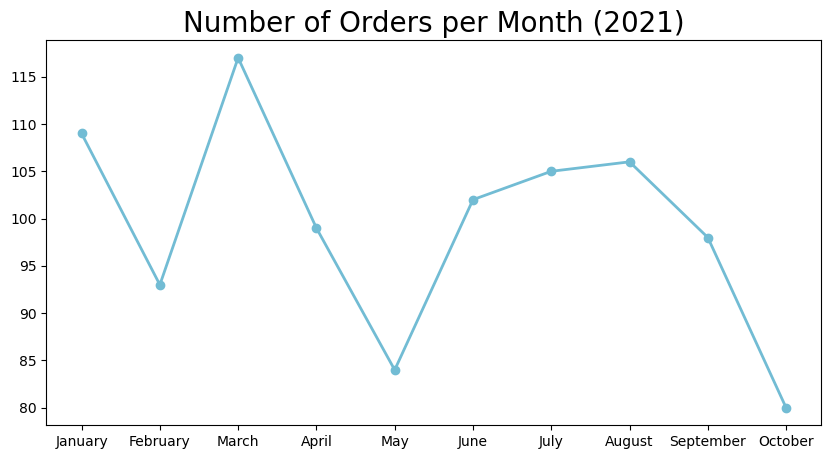

In [72]:
# melakukan resampling data dari harian ke bulanan
# 'order_id' dihitung jumlah uniknya sebagai jumlah order, dan 'total_price' dijumlahkan sebagai revenue
monthly_orders_df = all_df.resample(rule='ME', on='order_date').agg({
    "order_id": "nunique",     # Menghitung jumlah order unik tiap bulan
    "total_price": "sum"       # Menjumlahkan total revenue tiap bulan
})

# mengubah format index datetime menjadi nama bulan secara full (e.g., January, February)
monthly_orders_df.index = monthly_orders_df.index.strftime('%B')

# mereset index agar kolom bulan menjadi kolom biasa, bukan index
monthly_orders_df = monthly_orders_df.reset_index()

# mengubah nama kolom agar lebih deskriptif dan mudah dipahami
monthly_orders_df.rename(columns={
    "order_id": "order_count",     # Mengganti nama kolom dari 'order_id' menjadi 'order_count'
    "total_price": "revenue"       # Mengganti nama kolom dari 'total_price' menjadi 'revenue'
}, inplace=True)

# membuat figure atau kanvas untuk plot dengan ukuran 10x5
plt.figure(figsize=(10, 5))

# membuat line chart jumlah order per bulan
# X-axis: nama bulan (order_date), Y-axis: jumlah order (order_count)
# Ditambahkan marker dan pengaturan warna serta ketebalan garis
plt.plot(monthly_orders_df["order_date"], monthly_orders_df["order_count"], marker='o', linewidth=2, color="#72BCD4")

# menambahkan judul pada grafik
plt.title("Number of Orders per Month (2021)", loc="center", fontsize=20)

# menyesuaikan ukuran font pada sumbu X dan Y agar lebih terbaca
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# menampilkan grafik
plt.show()


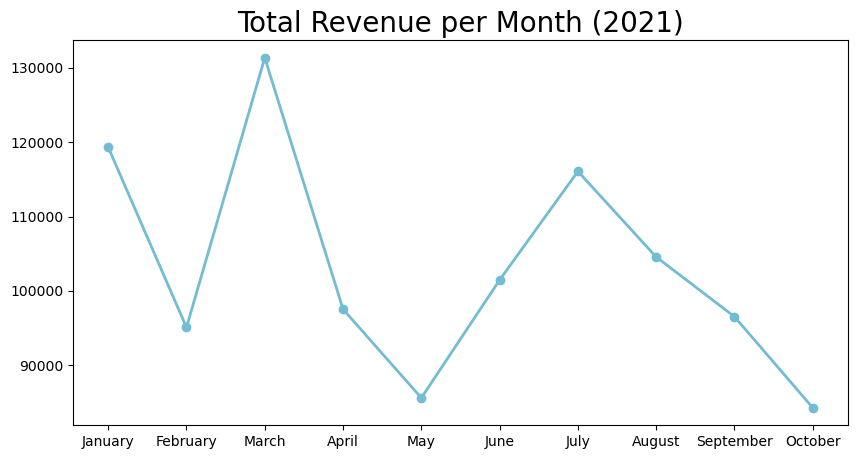

In [73]:
# dari data diatas terlihat bahwa jumlah order tertinggi terjadi di bulan Maret.
# penurunan signifikan tampak di bulan Februari, April, Mei, dan Oktober.

# penurunan tersebut tentunya akan mempengaruhi total revenue
plt.figure(figsize=(10, 5))
plt.plot(
    monthly_orders_df["order_date"],
    monthly_orders_df["revenue"],
    marker='o', 
    linewidth=2,
    color="#72BCD4"
)
plt.title("Total Revenue per Month (2021)", loc="center", fontsize=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

In [74]:
# dan dari data diatas benar memvalidasi pernyataan sebelumnnya 
# penurunan jumlah orderan yang sangat signifikan terjadi pada bulan Februari, April, Mei, dan Oktober berdampak terhadap penurunan revenue perusahaan.

### 2. Produk Apa yang Paling Banyak dan Paling Sedikit Terjual?

In [76]:
# produk dengan penjualan terbanyak dan paling sedikit.
sum_order_items_df = all_df.groupby("product_name").quantity_x.sum().sort_values(ascending=False).reset_index()
sum_order_items_df.head(15)

,product_name,quantity_x
0,Denim,527
1,Joggers,334
2,Pleated,308
3,Casual Slim Fit,306
4,Shearling,302
5,Relaxed Leg,301
6,Trench Coat,299
7,Puffer,298
8,Bomber,297
9,Chambray,290


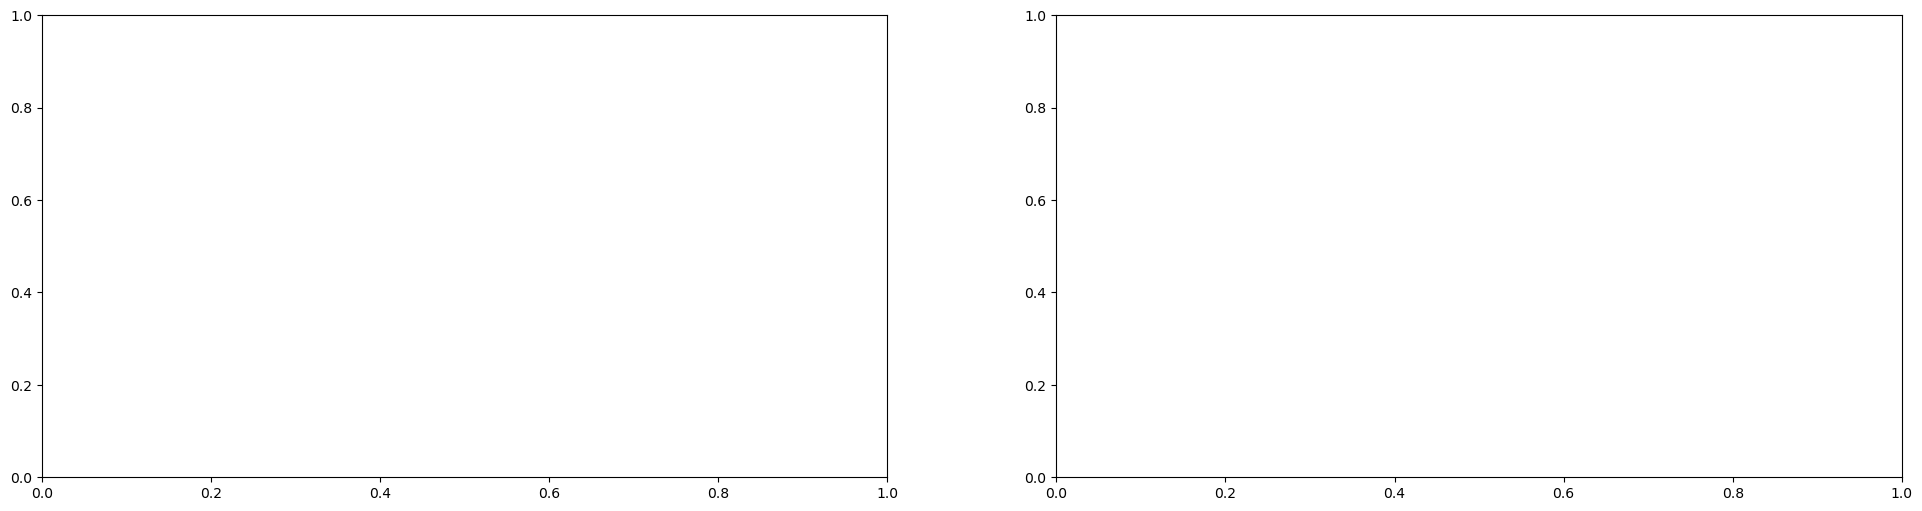

In [78]:
# membuat dua bar chart dalam satu gambar untuk membandingkan produk dengan performa terbaik dan terburuk.

# membuat kanvas kosong dengan object berupa fig dan ax
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

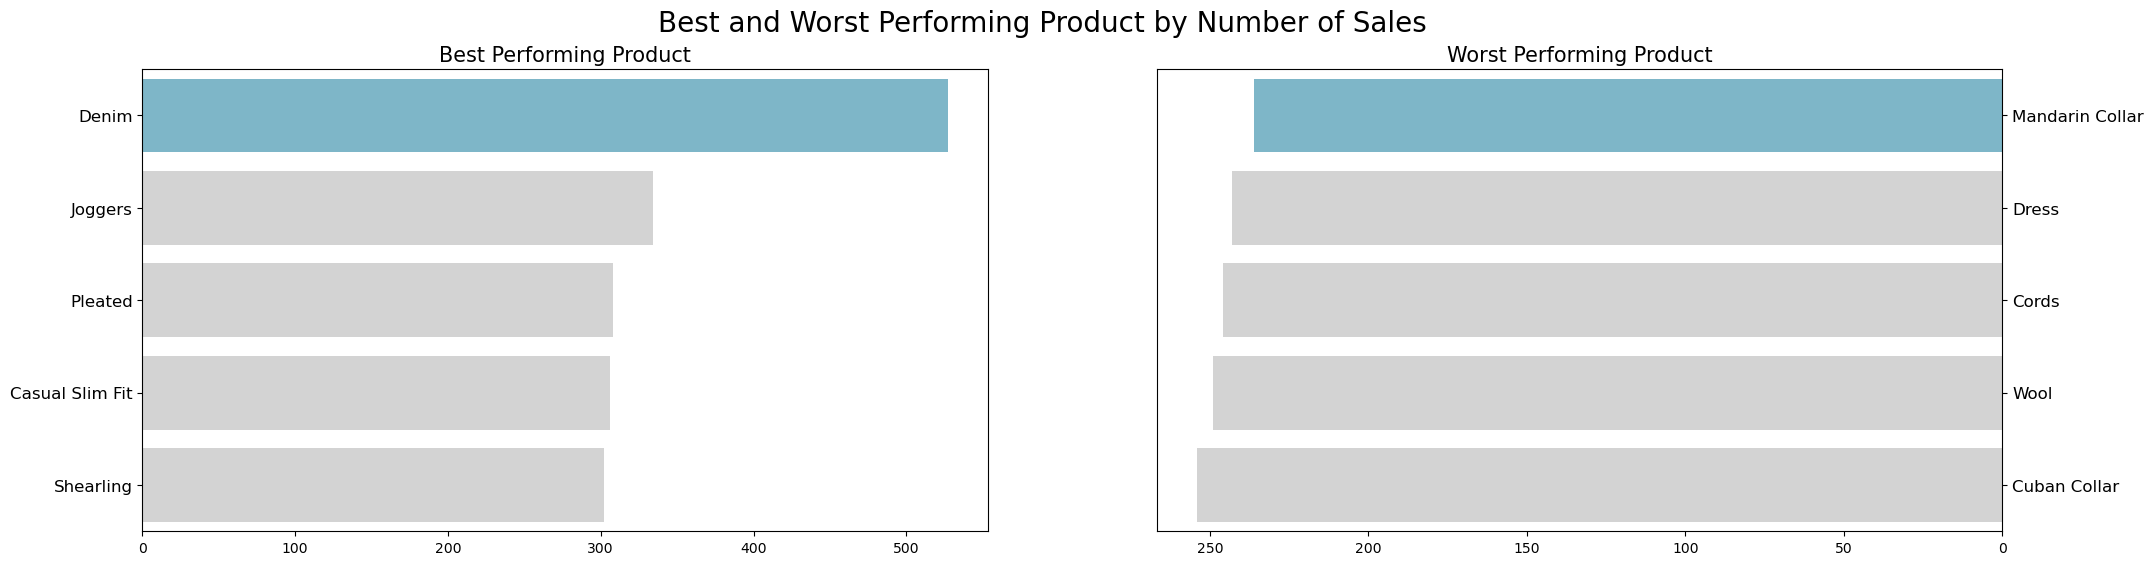

In [94]:
# mengisi kanvas kosong
# ax[0] merupakan object untuk kanvas pertama (bagian kiri) dan ax[1] merupakan object untuk kanvas kedua (bagian kanan)
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

# produk dengan performa terbaik
sns.barplot(
    x="quantity_x",
    y="product_name",
    hue="product_name",
    data=sum_order_items_df.head(5),
    palette=colors,
    ax=ax[0],
    legend=False
)
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Best Performing Product", loc="center", fontsize=15)
ax[0].tick_params(axis='y', labelsize=12)

# produk dengan performa terburuk
sns.barplot(
    x="quantity_x",
    y="product_name",
    hue="product_name",
    data=sum_order_items_df.sort_values(by="quantity_x", ascending=True).head(5),
    palette=colors,
    ax=ax[1],
    legend=False
)
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Worst Performing Product", loc="center", fontsize=15)
ax[1].tick_params(axis='y', labelsize=12)

plt.suptitle("Best and Worst Performing Product by Number of Sales", fontsize=20)
plt.show()

### 3. Bagaimana Demografi Pelanggan yang Kita Miliki?

#### Berdasarkan gender

In [114]:
orders_customers_df.groupby(by="gender").order_id.nunique().sort_values(ascending=False).reset_index()

,gender,order_id
0,Prefer not to say,725
1,Female,139
2,Male,136


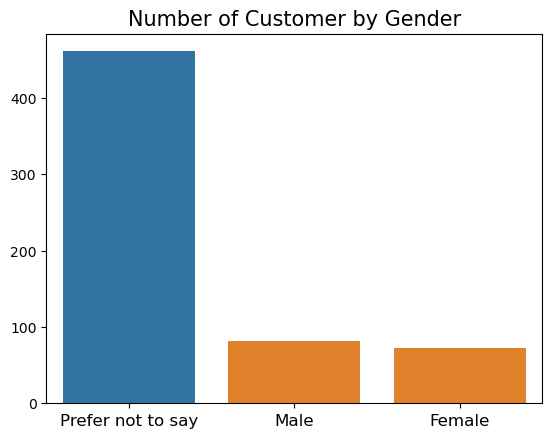

In [122]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


byage_df = all_df.groupby(by="gender").customer_id.nunique().reset_index()
byage_df.rename(columns={
    "customer_id": "customer_count"
}, inplace=True)

colors_ = ["#72BCD4", "#D3D3D3", "#D3D3D3"]
 
sns.barplot(
    y="customer_count", 
    x="gender",
    hue="gender",
    data=bygender_df.sort_values(by="customer_count", ascending=False),
    palette=colors
)
plt.title("Number of Customer by Gender", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=12)
plt.show()

#### Berdasarkan age

In [105]:
orders_customers_df["age_group"] = orders_customers_df.age.apply(lambda x: "Youth" if x <= 24 else("Senior" if x > 64 else "Adults"))
orders_customers_df.groupby(by="age_group").order_id.nunique().sort_values(ascending=False).reset_index()

,age_group,order_id
0,Adults,681
1,Senior,226
2,Youth,93


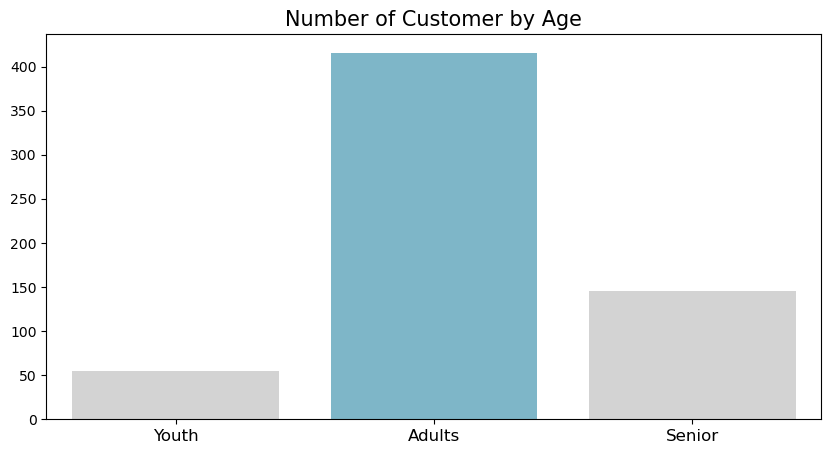

In [116]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


byage_df = all_df.groupby(by="age_group").customer_id.nunique().reset_index()
byage_df.rename(columns={
    "customer_id": "customer_count"
}, inplace=True)
byage_df
byage_df['age_group'] = pd.Categorical(byage_df['age_group'], ["Youth", "Adults", "Senior"])
plt.figure(figsize=(10, 5))
colors_ = ["#D3D3D3", "#72BCD4", "#D3D3D3"]
 
sns.barplot(
    y="customer_count", 
    x="age_group",
    hue="age_group",
    data=byage_df.sort_values(by="age_group", ascending=False),
    palette=colors_
)
plt.title("Number of Customer by Age", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=12)
plt.show()

#### Berdasarkan states

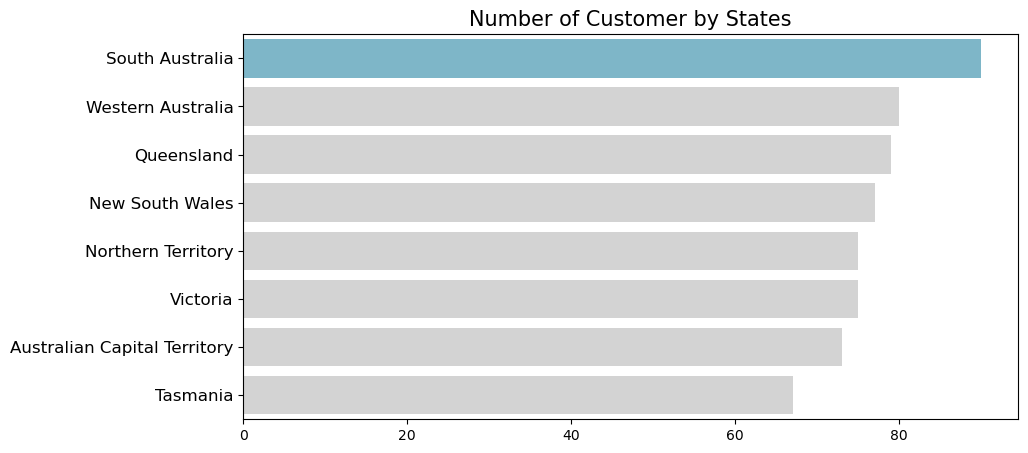

In [126]:
bystate_df = all_df.groupby(by="state").customer_id.nunique().reset_index()
bystate_df.rename(columns={
    "customer_id": "customer_count"
}, inplace=True)
bystate_df
plt.figure(figsize=(10, 5))
colors_ = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
sns.barplot(
    x="customer_count", 
    y="state",
    hue="state",
    data=bystate_df.sort_values(by="customer_count", ascending=False),
    palette=colors_
)
plt.title("Number of Customer by States", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='y', labelsize=12)
plt.show()

### 4. Menjawab 3 pertanyaan terakhir dengan RFM

- Recency: parameter yang digunakan untuk melihat kapan terakhir seorang pelanggan melakukan transaksi.
- Frequency: parameter ini digunakan untuk mengidentifikasi seberapa sering seorang pelanggan melakukan transaksi.
- Monetary: parameter terakhir ini digunakan untuk mengidentifikasi seberapa besar revenue yang berasal dari pelanggan tersebut.

In [133]:
# membuat sebuah DataFrame untuk menampung informasi terkait tiga parameter
rfm_df = all_df.groupby(by="customer_id", as_index=False).agg({
    "order_date": "max", # mengambil tanggal order terakhir
    "order_id": "nunique", # menghitung jumlah order
    "total_price": "sum" # menghitung jumlah revenue yang dihasilkan
})
rfm_df.columns = ["customer_id", "max_order_timestamp", "frequency", "monetary"]
 
# menghitung kapan terakhir pelanggan melakukan transaksi (hari)
rfm_df["max_order_timestamp"] = rfm_df["max_order_timestamp"].dt.date
recent_date = orders_df["order_date"].dt.date.max()
rfm_df["recency"] = rfm_df["max_order_timestamp"].apply(lambda x: (recent_date - x).days)
 
rfm_df.drop("max_order_timestamp", axis=1, inplace=True)
rfm_df.head()

,customer_id,frequency,monetary,recency
0,1,3,1641,203
1,7,1,1017,156
2,10,1,270,229
3,11,1,382,149
4,12,1,1551,127


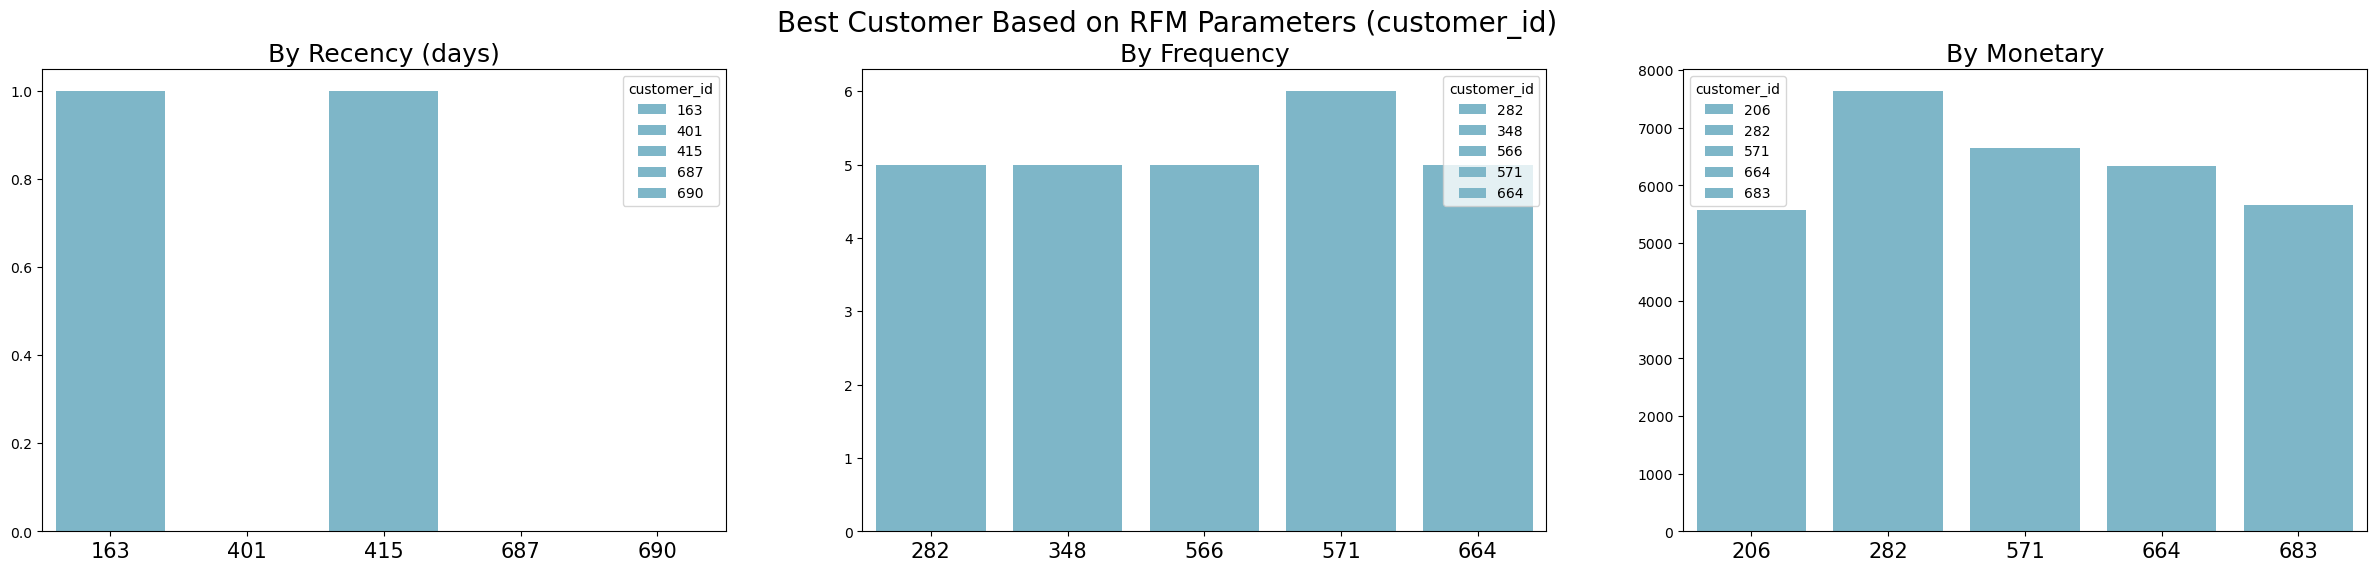

In [140]:
# mengidentifikasi best customer berdasarkan parameter frequency, monetary, dan recancy
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))
 
colors = ["#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4"]
 
sns.barplot(y="recency", x="customer_id", hue="customer_id", data=rfm_df.sort_values(by="recency", ascending=True).head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("By Recency (days)", loc="center", fontsize=18)
ax[0].tick_params(axis ='x', labelsize=15)
 
sns.barplot(y="frequency", x="customer_id", hue="customer_id", data=rfm_df.sort_values(by="frequency", ascending=False).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("By Frequency", loc="center", fontsize=18)
ax[1].tick_params(axis='x', labelsize=15)
 
sns.barplot(y="monetary", x="customer_id", hue="customer_id", data=rfm_df.sort_values(by="monetary", ascending=False).head(5), palette=colors, ax=ax[2])
ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].set_title("By Monetary", loc="center", fontsize=18)
ax[2].tick_params(axis='x', labelsize=15)
 
plt.suptitle("Best Customer Based on RFM Parameters (customer_id)", fontsize=20)
plt.show()